# <font color=darkblue>Economic Indicators for China</font>

Yang Yang
15316675

## Table of Contents
* [Economic Indicators for China](#Economic-Indicators-for-China)

* [1. Introduction](#1.-Introduction)
	* [Library Import & Setup](#Library-Import-&-Setup)
    

* [2. Data Acquisition,Wrangling,Integration](#2.-Data-Acquisition-,-Wrangling-,-Integration)
	* [2.1 Data Acquisition & Wrangling](#2.1-Data-Acquisition-&-Wrangling)
        * [Web Scraping](#Web-Scraping)
        * [Web APIs](#Web-APIs)
        * [Static Dataset](#Static-Dataset)                        
    * [2.2 Data Integration](#2.2-Data-Integration)


* [3. Data Analysis](#3.-Data-Analysis)
	* [3.1 Indicators Change by Time](#3.1-Indicators-Change-by-Time)
    * [3.2 Pearson's Correlation](#3.2-Pearson's-Correlation)
    * [3.3 Result Discussion](#3.3-Result-Discussion)

                                                                                
* [4. Predictive Modelling](#4.-Predictive-Modelling)
	* [4.1 OLS Regression Model for the association between RMB Exchange Rate and China GDP](#4.1-OLS-Regression-Model-for-the-association-between-RMB-Exchange-Rate-and-China-GDP)
        * [Regression Line Confidence Intervals](#Regression-Line-Confidence-Intervals)
        * [Polynomial Regression Model 1](#Polynomial-Regression-Model-1)

    * [4.2 OLS Regression Model for the association between RMB Exchange Rate and RMB Money Supply](#4.2-OLS-Regression-Model-for-the-association-between-RMB-Exchange-Rate-and-RMB-Money-Supply)
        * [Polynomial Regression Model 2](#Polynomial-Regression-Model-2)
        
    * [4.3 OLS Regression Model for the association between RMB Exchange Rate and Retail Sales of Consumer Goods](#4.3-OLS-Regression-Model-for-the-association-between-RMB-Exchange-Rate-and-Retail-Sales-of-Consumer-Goods)
        * [Polynomial Regression Model 3](#Polynomial-Regression-Model-3)
        
    * [4.4 Multiple Linear Regression](#4.4-Multiple-Linear-Regression)
    
         
* [5. Conclusion](#5.-Conclusion)

# 1. Introduction

In this report, we will use multiple methods to get China macroeconomic data from Internet and look into these data. Also we will investigate the relationships among different macroeconomic indicators of China. Based on our findings, we will generate OLS Regression Model and make predictions by k-Nearest Neighbors, also conduct experiments and evaluate these models.

#### Library Import & Setup

In [87]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import json
from time import sleep
from datetime import datetime
%matplotlib inline

In [88]:
from sklearn import neighbors
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'medium'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [89]:
#regression library
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 2. Data Acquisition,Wrangling,Integration

## 2.1 Data Acquisition & Wrangling

## Web Scraping

** Note that this will connect to server many times,usually it works! But it is possible you cannot get correct response sometimes, if you have problem to get the data,please use the read_csv to read from the file I previously record the data and jump executing the codes in this section. **

In [90]:
#if the server has something wrong, please use below code to read from the file.
#exchange_rate = pd.read_csv("China_exchange_rate.csv")

#### Get Exchange Rate - Chinese Yuan RMB per 1 US Dollar - Monthly average

Source: http://www.x-rates.com/average/?from=USD&to=CNY&amount=1&year=2015

In [91]:
url = 'http://www.x-rates.com/average/?from=USD&to=CNY&amount=1&year=2016'
response = requests.get(url)
print response

<Response [200]>


In [92]:
htmlpage = response.content
scraping = BeautifulSoup(htmlpage, "lxml")
table = scraping.find(name='ul', attrs={"class":"OutputLinksAvg"})
table

<ul class="OutputLinksAvg"><li><span class="avgMonth">Jan</span> <span class="avgRate">6.569612</span> <span class="avgDays">\u2013 31 days</span></li>\n<li><span class="avgMonth">Feb</span> <span class="avgRate">6.550425</span> <span class="avgDays">\u2013 29 days</span></li>\n<li><span class="avgMonth">Mar</span> <span class="avgRate">6.501142</span> <span class="avgDays">\u2013 31 days</span></li>\n<li><span class="avgMonth">Apr</span> <span class="avgRate">6.477534</span> <span class="avgDays">\u2013 30 days</span></li>\n<li><span class="avgMonth">May</span> <span class="avgRate">6.530591</span> <span class="avgDays">\u2013 31 days</span></li>\n<li><span class="avgMonth">Jun</span> <span class="avgRate">6.589098</span> <span class="avgDays">\u2013 30 days</span></li>\n<li><span class="avgMonth">Jul</span> <span class="avgRate">6.675491</span> <span class="avgDays">\u2013 31 days</span></li>\n<li><span class="avgMonth">Aug</span> <span class="avgRate">6.649596</span> <span class="av

In [93]:
my_list = table.findAll('li')
my_list

[<li><span class="avgMonth">Jan</span> <span class="avgRate">6.569612</span> <span class="avgDays">\u2013 31 days</span></li>,
 <li><span class="avgMonth">Feb</span> <span class="avgRate">6.550425</span> <span class="avgDays">\u2013 29 days</span></li>,
 <li><span class="avgMonth">Mar</span> <span class="avgRate">6.501142</span> <span class="avgDays">\u2013 31 days</span></li>,
 <li><span class="avgMonth">Apr</span> <span class="avgRate">6.477534</span> <span class="avgDays">\u2013 30 days</span></li>,
 <li><span class="avgMonth">May</span> <span class="avgRate">6.530591</span> <span class="avgDays">\u2013 31 days</span></li>,
 <li><span class="avgMonth">Jun</span> <span class="avgRate">6.589098</span> <span class="avgDays">\u2013 30 days</span></li>,
 <li><span class="avgMonth">Jul</span> <span class="avgRate">6.675491</span> <span class="avgDays">\u2013 31 days</span></li>,
 <li><span class="avgMonth">Aug</span> <span class="avgRate">6.649596</span> <span class="avgDays">\u2013 31 da

In [94]:
data = {'Date' : [],'Exchange Rate' : []}
for x in range(len(my_list)):
    date = my_list[x].find("span", attrs={"class" : "avgMonth"})
    rate = my_list[x].find("span", attrs={"class" : "avgRate"})
    data['Date'].append(date.getText())
    data['Exchange Rate'].append(rate.getText())
    
exchange_rate_2016 = pd.DataFrame(data)
exchange_rate_2016

,Date,Exchange Rate
0,Jan,6.569612
1,Feb,6.550425
2,Mar,6.501142
3,Apr,6.477534
4,May,6.530591
5,Jun,6.589098
6,Jul,6.675491
7,Aug,6.649596


In [95]:
#convert data type
exchange_rate_2016['Date']= range(1,9)
exchange_rate_2016['Date'] = exchange_rate_2016['Date'].astype(str)
exchange_rate_2016['Date'] = '2016' + '-' + exchange_rate_2016['Date']    
exchange_rate_2016['Date'] = pd.to_datetime(exchange_rate_2016['Date'])
exchange_rate_2016['Exchange Rate'] = pd.to_numeric(exchange_rate_2016['Exchange Rate'])
exchange_rate_2016

,Date,Exchange Rate
0,2016-01-01,6.569612
1,2016-02-01,6.550425
2,2016-03-01,6.501142
3,2016-04-01,6.477534
4,2016-05-01,6.530591
5,2016-06-01,6.589098
6,2016-07-01,6.675491
7,2016-08-01,6.649596


Above shows the process of web scraping. Next let's define two functions to get data from other years in order to get a data collection during a period.

In [96]:
def exchange_rate_year(year):
    url = 'http://www.x-rates.com/average/?from=USD&to=CNY&amount=1&year=' + year
    response = requests.get(url)
    print response
    htmlpage = response.content
    scraping = BeautifulSoup(htmlpage, "lxml")
    table = scraping.find(name='ul', attrs={"class":"OutputLinksAvg"})
    my_list = table.findAll('li')
    data = {'Date' : [],'Exchange Rate' : []}
    for x in range(len(my_list)):
        date = my_list[x].find("span", attrs={"class" : "avgMonth"})
        rate = my_list[x].find("span", attrs={"class" : "avgRate"})
        data['Date'].append(date.getText())
        data['Exchange Rate'].append(rate.getText())
    exchange_rate = pd.DataFrame(data)
    exchange_rate['Date']=range(1,13)
    exchange_rate['Date'] = exchange_rate['Date'].astype(str)
    exchange_rate['Date'] = year + '-' + exchange_rate['Date']
    exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'])
    exchange_rate['Exchange Rate'] = pd.to_numeric(exchange_rate['Exchange Rate'])
    return exchange_rate


def exchange_rate_period(begin,end):
    years=[]
    for i in range(begin,end):
            s = str(i)
            years.append(s)
    #print years
    frames = []
    for year in years:
            frames.append(exchange_rate_year(year))
    total = pd.concat(frames)
    return total 

In [97]:
#test function
exchange_rate_year('2006').head()

<Response [200]>


,Date,Exchange Rate
0,2006-01-01,8.065469
1,2006-02-01,8.050946
2,2006-03-01,8.034951
3,2006-04-01,8.013996
4,2006-05-01,8.013390


This will connect to server many times,usually it works! But it is possible you cannot get correct response sometimes, if you have problem to get the data,please use the read_csv to read from the file I previously record the data.

In [98]:
exchange_rate = exchange_rate_period(2006,2016)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [99]:
exchange_rate.head()

,Date,Exchange Rate
0,2006-01-01,8.065469
1,2006-02-01,8.050946
2,2006-03-01,8.034951
3,2006-04-01,8.013996
4,2006-05-01,8.013390


In [100]:
#merge it with data in 2016
exchange_rate = pd.concat([exchange_rate,exchange_rate_2016])
#exchange_rate

In [101]:
exchange_rate.to_csv("China_exchange_rate.csv")

Now we get China RMB exchange rate monthly data from year 2006 to 2016.

## Web APIs

Source: https://www.quandl.com/data/NBSC?keyword=National%20Bureau%20of%20Statistics%20of%20China

Next we will use API to get some macroeconomic indicator data. Here are self-defined functions to get data and clean the data.

In [102]:
def getYearMonth(s):
  return s.split("-")[0]+"-"+s.split("-")[1]

In [103]:
def get_clean_df(name,url):
    response = requests.get(url)
    data = json.loads(response.content)
    #convert jason to dataframe
    df = pd.DataFrame(data['dataset']['data'])
    #rename columns
    df.columns = ['Date', name]
    #keep year and month, remove date
    df['Date']= df['Date'].apply(lambda x: getYearMonth(x))
    #convert to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    return df

#### Gross Domestic Product, Current Quarter - National Data - Quarterly - Units: 100 million yuan

In [104]:
url = 'https://www.quandl.com/api/v3/datasets/NBSC/A010101_Q.json?api_key=qsNrYFpdbHFu59eWf6yA'
gdp = get_clean_df('GDP(100 million yuan)',url)
gdp.head()

,Date,GDP(100 million yuan)
0,2016-06-01,179926.6
1,2016-03-01,160710.2
2,2015-12-01,192250.8
3,2015-09-01,175616.0
4,2015-06-01,167651.2


As gdp is quarterly data, I need to make it monthly by filling data.

In [105]:
new = pd.merge(exchange_rate,gdp,on ='Date',how='outer')
new = new.ix[2:]
new.head()

,Date,Exchange Rate,GDP(100 million yuan)
2,2006-03-01,8.034951,46678.294887
3,2006-04-01,8.013996,NaN
4,2006-05-01,8.013390,NaN
5,2006-06-01,8.006883,52560.416831
6,2006-07-01,7.988319,NaN


In [106]:
#replace NaN in GDP with previous data in quarter
new['GDP(100 million yuan)'] = new['GDP(100 million yuan)'].ffill()
new.dropna(inplace=True)

In [107]:
new.drop('Exchange Rate', axis=1, inplace=True)
new.head()

,Date,GDP(100 million yuan)
2,2006-03-01,46678.294887
3,2006-04-01,46678.294887
4,2006-05-01,46678.294887
5,2006-06-01,52560.416831
6,2006-07-01,52560.416831


In [108]:
#update gdp
gdp=new

#### Money (M1) Supply, period-end - Units: 100 million yuan

In [109]:
url='https://www.quandl.com/api/v3/datasets/NBSC/A0B0103_M.json?api_key=qsNrYFpdbHFu59eWf6yA'
money_supply = get_clean_df('Money Supply(100 million yuan)',url)
money_supply.head()

,Date,Money Supply(100 million yuan)
0,2016-03-01,411581.310000
1,2016-02-01,392504.700000
2,2016-01-01,412685.640000
3,2015-12-01,400953.440048
4,2015-11-01,387618.320000


#### Total Retail Sales of Consumer Goods, Current Period - Units: 100 million yuan

https://www.quandl.com/data/NBSC/A050101_M-Total-Retail-Sales-of-Consumer-Goods-Current-Period

In [110]:
url = 'https://www.quandl.com/api/v3/datasets/NBSC/A050101_M.json?api_key=qsNrYFpdbHFu59eWf6yA'
domestic_trade = get_clean_df('Retail Sales of Consumer Goods(100 million yuan)',url)
domestic_trade.head()

,Date,Retail Sales of Consumer Goods(100 million yuan)
0,2016-03-01,25114.100000
1,2015-12-01,28634.600000
2,2015-11-01,27937.345834
3,2015-10-01,28278.889623
4,2015-09-01,25270.600000


#### Balance of Imports and Exports, Current Period - Units: 1,000 US dollars

https://www.quandl.com/data/NBSC/A06010D_M-Balance-of-Imports-and-Exports-Current-Period

In [111]:
url = 'https://www.quandl.com/api/v3/datasets/NBSC/A06010D_M.json?api_key=qsNrYFpdbHFu59eWf6yA'
foreign_trade = get_clean_df('Balance of Trade(1,000 US dollars)',url)
foreign_trade.head()

,Date,"Balance of Trade(1,000 US dollars)"
0,2016-03-01,29857078.0
1,2016-02-01,32592484.0
2,2016-01-01,63286844.0
3,2015-12-01,59389164.0
4,2015-11-01,53744813.0


## Static Dataset

#### Government Expenditure & Revenue - Units: 100 million yuan

Source: http://data.stats.gov.cn/english/adv.htm?m=advquery&cn=A01

In [112]:
gov = pd.read_csv("government.csv")

In [113]:
gov.head()

,Indicators,2016-07-01,2016-06-01,2016-05-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-12-01,2015-11-01,...,2006-10-01,2006-09-01,2006-08-01,2006-07-01,2006-06-01,2006-05-01,2006-04-01,2006-03-01,2006-02-01,2006-01-01
0,Government Expenditure Current Period(100 mil...,12768,22636.9,15460.5,13109.3,16788.0,11036.2,10134.1,NaN,16069.4,...,2670.6,3426.2,2604.9,2524.8,3414.6,2166.3,2728.5,2504.1,1559.7,2227.9
1,Government Revenue Current Period(100 million ...,14770,15634.1,15460.8,15522.9,11511.2,10218.5,17166.3,NaN,11087.4,...,3800.6,2876.8,2695.9,4043.8,3374.9,3060.5,4270.5,2894.4,2534.6,3871.0


In [114]:
gov = gov.set_index('Indicators')
gov = gov.transpose()
gov = gov.reset_index()

In [115]:
gov.columns=['Date','Government Expenditure(100 million yuan)','Government Revenue(100 million yuan)']

In [116]:
#fill NaN
gov = gov.bfill()
gov.head()

,Date,Government Expenditure(100 million yuan),Government Revenue(100 million yuan)
0,2016-07-01,12768.0,14770.0
1,2016-06-01,22636.9,15634.1
2,2016-05-01,15460.5,15460.8
3,2016-04-01,13109.3,15522.9
4,2016-03-01,16788.0,11511.2


In [117]:
#check data types
gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
Date                                        127 non-null object
Government Expenditure(100 million yuan)    127 non-null float64
Government Revenue(100 million yuan)        127 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [118]:
#convert data types
gov['Date'] = pd.to_datetime(gov['Date'])
gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
Date                                        127 non-null datetime64[ns]
Government Expenditure(100 million yuan)    127 non-null float64
Government Revenue(100 million yuan)        127 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.0 KB


#### Interest Rate

Source: http://data.imf.org/regular.aspx?key=60998111

In [119]:
interest_rate = pd.read_csv("China_interest_rate.csv")
interest_rate.head()

,Unnamed: 0,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,...,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07
0,Deposit Rate,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25,...,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
1,Lending Rate,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,...,4.35,4.35,4.35,4.35,4.35,4.35,4.35,4.35,4.35,4.35


In [120]:
interest_rate = interest_rate.transpose()
interest_rate = interest_rate.reset_index()
interest_rate = interest_rate.ix[1:]
interest_rate.columns = ['Date','Deposit Rate','Lending Rate']
interest_rate.head()

,Date,Deposit Rate,Lending Rate
1,2000-01,2.25,5.85
2,2000-02,2.25,5.85
3,2000-03,2.25,5.85
4,2000-04,2.25,5.85
5,2000-05,2.25,5.85


In [121]:
#convert data types
interest_rate['Date'] = pd.to_datetime(interest_rate['Date'])
interest_rate['Deposit Rate'] = pd.to_numeric(interest_rate['Deposit Rate'])
interest_rate['Lending Rate'] = pd.to_numeric(interest_rate['Lending Rate'])
interest_rate.head()

,Date,Deposit Rate,Lending Rate
1,2000-01-01,2.25,5.85
2,2000-02-01,2.25,5.85
3,2000-03-01,2.25,5.85
4,2000-04-01,2.25,5.85
5,2000-05-01,2.25,5.85


In [122]:
interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 1 to 199
Data columns (total 3 columns):
Date            199 non-null datetime64[ns]
Deposit Rate    199 non-null float64
Lending Rate    199 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.7 KB


## 2.2 Data Integration

It's time to integrate all data we have.

In [123]:
indicators = [
            gdp,
            money_supply,
            gov,
            domestic_trade,
            foreign_trade,
            interest_rate
             ]

china=exchange_rate
for x in indicators:
    china = pd.merge(china,x,on ='Date')

china.head()

,Date,Exchange Rate,GDP(100 million yuan),Money Supply(100 million yuan),Government Expenditure(100 million yuan),Government Revenue(100 million yuan),Retail Sales of Consumer Goods(100 million yuan),"Balance of Trade(1,000 US dollars)",Deposit Rate,Lending Rate
0,2006-03-01,8.034951,46678.294887,106737.08,2504.1,2894.4,5796.7,11188705.0,2.25,5.58
1,2006-04-01,8.013996,46678.294887,106389.11,2728.5,4270.5,5774.6,10456822.0,2.25,5.85
2,2006-05-01,8.013390,46678.294887,109219.22,2166.3,3060.5,6175.6,13004151.0,2.25,5.85
3,2006-06-01,8.006883,52560.416831,112342.36,3414.6,3374.9,6057.8,14502919.0,2.25,5.85
4,2006-07-01,7.988319,52560.416831,112653.04,2524.8,4043.8,6012.2,14623639.0,2.25,5.85


In [124]:
#rename columns to make it simple
china.columns = ['Date','exchange_rate','gdp','money_supply','gov_expenditure','gov_revenue','consumer_sales','trade_balance','deposit_rate','lending_rate']
china.head()

,Date,exchange_rate,gdp,money_supply,gov_expenditure,gov_revenue,consumer_sales,trade_balance,deposit_rate,lending_rate
0,2006-03-01,8.034951,46678.294887,106737.08,2504.1,2894.4,5796.7,11188705.0,2.25,5.58
1,2006-04-01,8.013996,46678.294887,106389.11,2728.5,4270.5,5774.6,10456822.0,2.25,5.85
2,2006-05-01,8.013390,46678.294887,109219.22,2166.3,3060.5,6175.6,13004151.0,2.25,5.85
3,2006-06-01,8.006883,52560.416831,112342.36,3414.6,3374.9,6057.8,14502919.0,2.25,5.85
4,2006-07-01,7.988319,52560.416831,112653.04,2524.8,4043.8,6012.2,14623639.0,2.25,5.85


Check the begin date and end date.

In [125]:
china.Date.head()

0   2006-03-01
1   2006-04-01
2   2006-05-01
3   2006-06-01
4   2006-07-01
Name: Date, dtype: datetime64[ns]

In [126]:
china.Date.tail()

106   2015-09-01
107   2015-10-01
108   2015-11-01
109   2015-12-01
110   2016-03-01
Name: Date, dtype: datetime64[ns]

Finally, we get a dataframe contains multiple macroeconomic data of China in last ten years by month.

## 3. Data Analysis

Here let's see some general information about these data.

In [127]:
china.describe()

,exchange_rate,gdp,money_supply,gov_expenditure,gov_revenue,consumer_sales,trade_balance,deposit_rate,lending_rate
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000
mean,6.763359,107825.376074,238735.718096,7961.237838,7704.336036,14328.869428,2.343672e+07,2.841441,5.976577
std,0.577938,38194.241738,83573.350888,4407.028682,3290.013773,6199.614733,1.436345e+07,0.666528,0.757246
min,6.073637,46678.294887,106389.110000,1870.900000,2660.700000,5774.600000,-7.306100e+06,1.500000,4.350000
25%,6.288445,77894.310766,154932.515000,4110.800000,5029.300000,8891.500000,1.452103e+07,2.250000,5.310000
50%,6.669171,103456.865042,253313.170000,6577.400000,7396.600000,13588.000000,2.042496e+07,3.000000,6.000000
75%,6.876023,138737.966190,310747.375000,11164.050000,10092.650000,18886.257733,2.961195e+07,3.250000,6.390000
max,8.034951,192250.800000,411581.310000,19974.200000,15335.200000,28634.600000,6.164339e+07,4.140000,7.470000


From the table above, we can see:
    1. we have 111 available data for every indicator
    2. data in different columns have quite different scales
    3. During recent ten years, max exchange rate is 8.03 while minimum is 6.71
    4. Deposite rate highest is 4.14%, lowest is 1.5%, Lending rate highest is 7.47%, lowest is 4.35%
    5. Balance of trade, min shows there was trade deficit during the 10 years, but overall it's positive, which means China has more exporting then importing.

*A positive balance is known as a trade surplus if it consists of exporting more than is imported; a negative balance is referred to as a trade deficit or, informally, a trade gap.
Source: Boundless. “The Balance of Trade.” Boundless Economics. Boundless, 26 May. 2016. Retrieved 30 Aug. 2016 from https://www.boundless.com/economics/textbooks/boundless-economics-textbook/international-trade-31/the-united-states-in-the-global-economy-126/the-balance-of-trade-500-12596/

## 3.1 Indicators Change by Time

First, let's see the change of each indicator during the ten years.

Here we design some functions which can be used repeatly.

In [128]:
#get month increasing values by shifting 'Date' column
def get_increasing(df):
    return df - df.shift(1)


def view(df,title,xlabel,ylabel,pkind='line',show_increase=0):
    #set 'Date' as index
    df = df.set_index(['Date'])
    df.plot(kind=pkind)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(show_increase==1):
        print '\n\n'
        increase = get_increasing(df)
        increase.plot(title='Monthly Increase Rate')
        plt.xlabel(xlabel)
        plt.ylabel('Monthly Increasing percent')

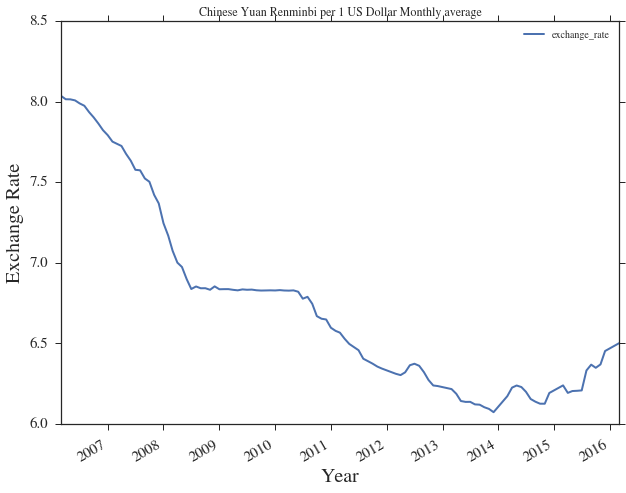

In [129]:
data = china[['Date','exchange_rate']]
view(data, 'Chinese Yuan Renminbi per 1 US Dollar Monthly average', 'Year','Exchange Rate')

We can see that the exchange rate of China RMB is decreasing during the years. The dramatic drop was in the financial crisis around year 2008.

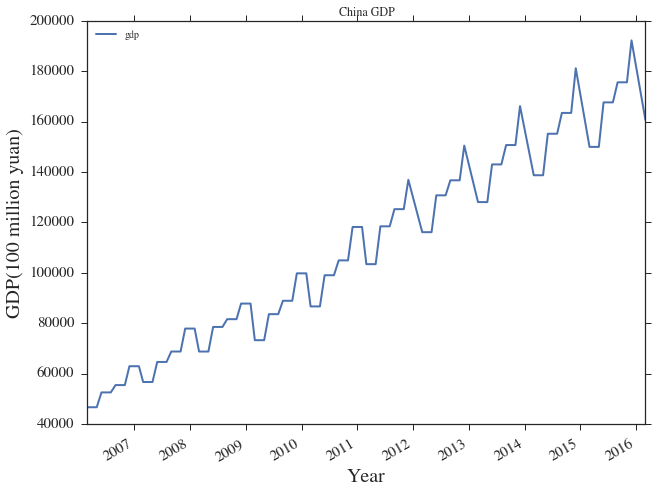

In [130]:
data = china[['Date','gdp']]
view(data, 'China GDP', 'Year','GDP(100 million yuan)')

China GDP is keep growing. China succeeded in quadrupling its gross domestic product (GDP) in last ten years. 

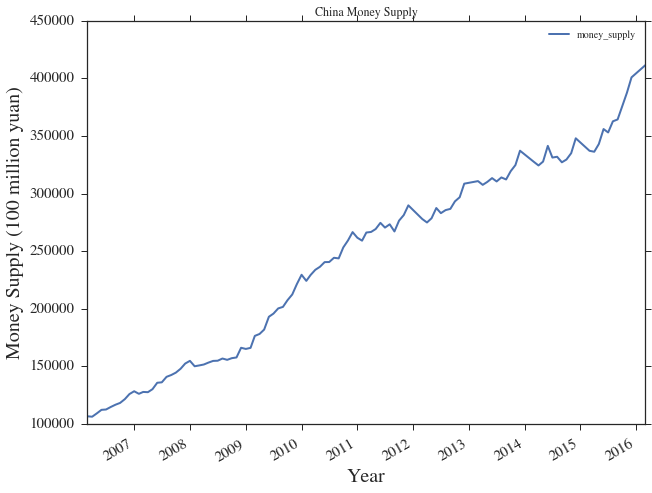

In [131]:
data = china[['Date','money_supply']]
view(data, 'China Money Supply', 'Year','Money Supply (100 million yuan)')

The money supply of China is also keep growing.

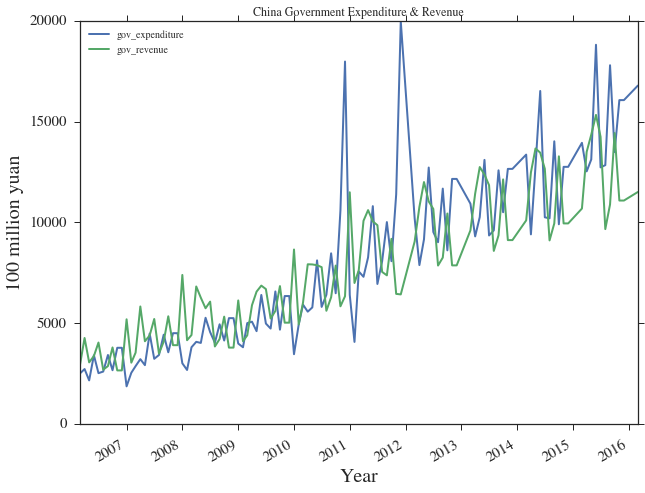

In [132]:
data = china[['Date','gov_expenditure','gov_revenue']]
view(data, 'China Government Expenditure & Revenue', 'Year','100 million yuan')

The government expenditure and government revenue of China flunctuated extremely during these years, but they are growing overall.

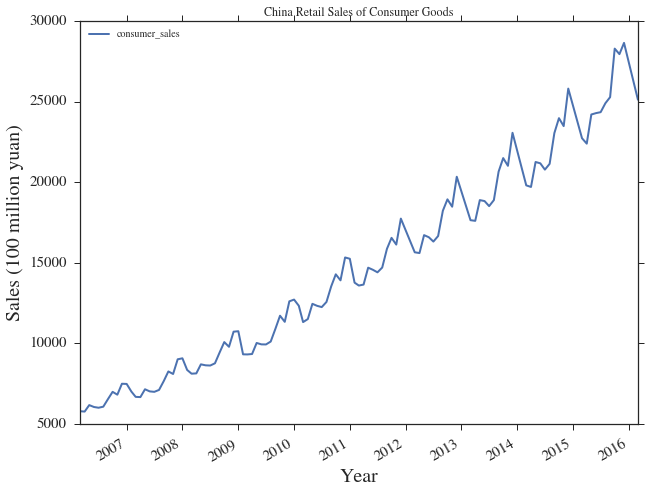

In [133]:
data = china[['Date','consumer_sales']]
view(data, 'China Retail Sales of Consumer Goods', 'Year','Sales (100 million yuan)')

It is also obvious that China retail sales of consumer goods is ascending during the years. This is an important indicator to reflect domestic trade of China. It means the domestic market of China is developing very well.

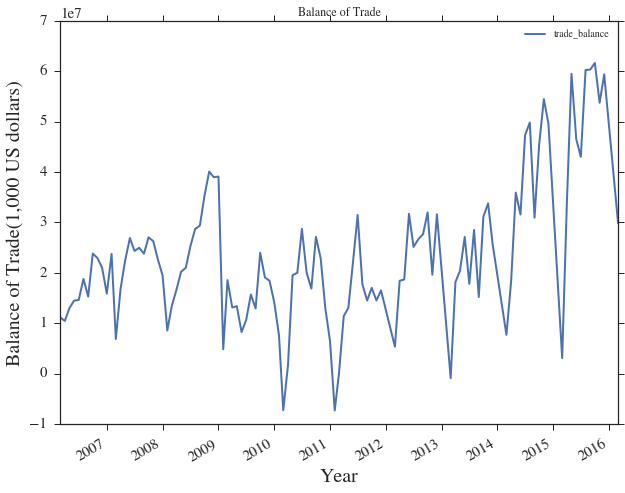

In [134]:
data = china[['Date','trade_balance']]
view(data, 'Balance of Trade', 'Year','Balance of Trade(1,000 US dollars)')

The balance of trade flunctuated extremely during the ten years. We can see that during 2010 and 2012 there was trade deficit, but most time, China has more exporting then importing.

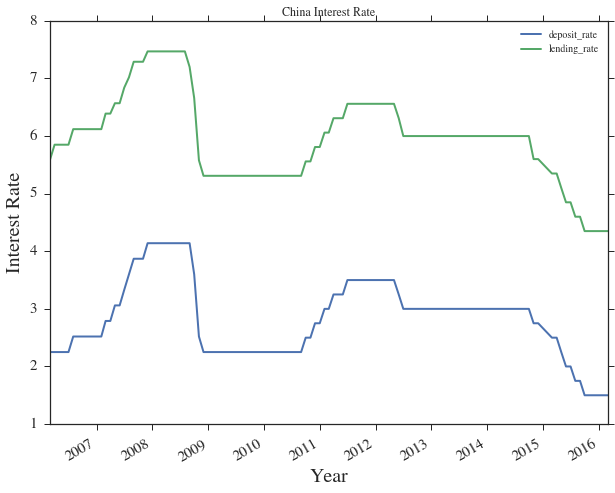

In [135]:
data = china[['Date','deposit_rate','lending_rate']]
view(data, 'China Interest Rate', 'Year','Interest Rate')

Interest rate reach to their lowest points for last ten years right now.

## 3.2 Pearson's Correlation

In this section, we will check if there is any relationship among these indicators.

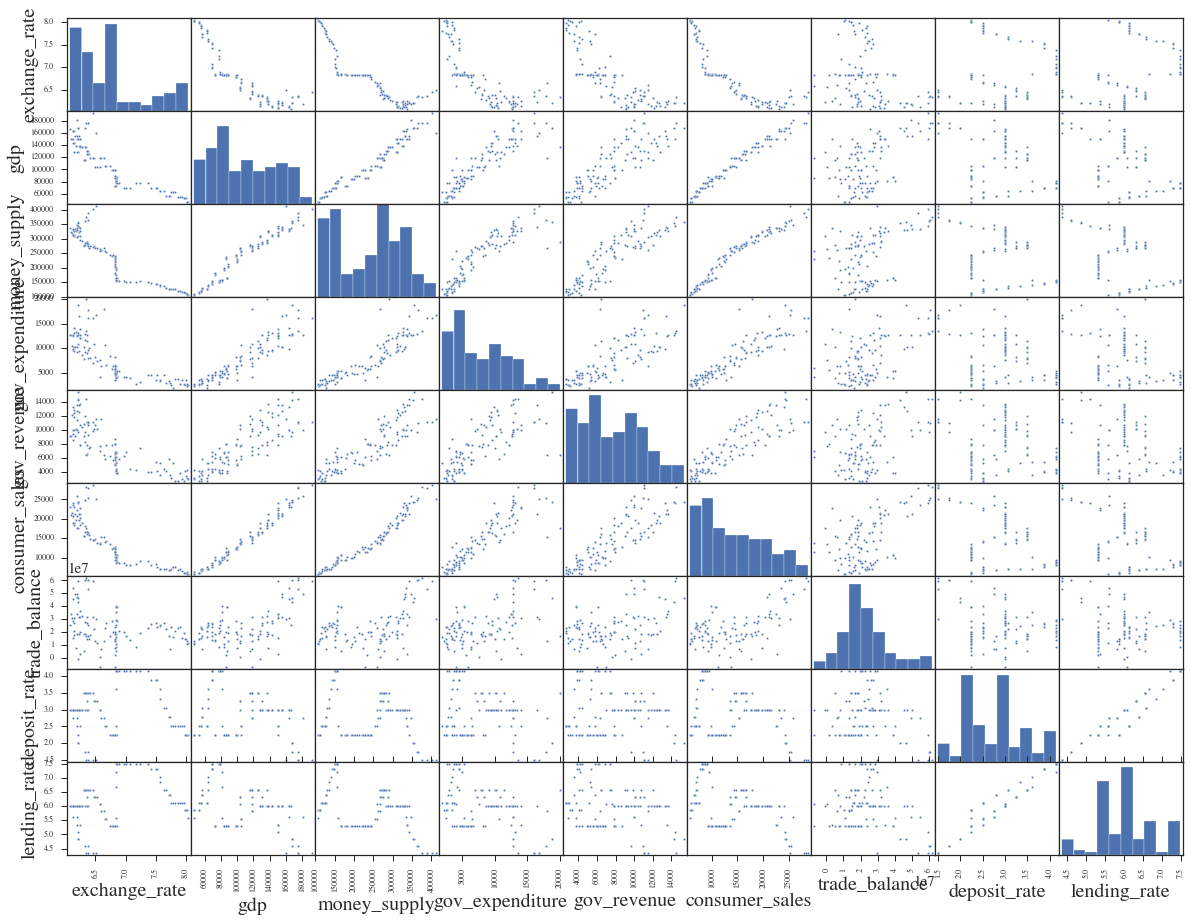

In [136]:
_=pd.tools.plotting.scatter_matrix(china,alpha=1,figsize=[20,15],diagonal='hist')

In [137]:
china.corr()

,exchange_rate,gdp,money_supply,gov_expenditure,gov_revenue,consumer_sales,trade_balance,deposit_rate,lending_rate
exchange_rate,1.000000,-0.881664,-0.896202,-0.771573,-0.807093,-0.843693,-0.306374,-0.011071,0.265885
gdp,-0.881664,1.000000,0.973945,0.895140,0.846686,0.987028,0.536734,-0.188497,-0.417173
money_supply,-0.896202,0.973945,1.000000,0.893907,0.879714,0.972804,0.434977,-0.234373,-0.465988
gov_expenditure,-0.771573,0.895140,0.893907,1.000000,0.744375,0.895056,0.449172,-0.197184,-0.394893
gov_revenue,-0.807093,0.846686,0.879714,0.744375,1.000000,0.862534,0.417100,-0.129744,-0.336223
consumer_sales,-0.843693,0.987028,0.972804,0.895056,0.862534,1.000000,0.567218,-0.258020,-0.473523
trade_balance,-0.306374,0.536734,0.434977,0.449172,0.417100,0.567218,1.000000,-0.206665,-0.286771
deposit_rate,-0.011071,-0.188497,-0.234373,-0.197184,-0.129744,-0.258020,-0.206665,1.000000,0.957011
lending_rate,0.265885,-0.417173,-0.465988,-0.394893,-0.336223,-0.473523,-0.286771,0.957011,1.000000


## 3.3 Result Discussion

From Pearson's correlation values above, we can see obvious relationship between:
    1. Exchange Rate ~ GDP, Money Supply, Retail Sales of Consumer Goods
    2. GDP ~ Retail Sales of Consumer Goods,Money Supply, Government Expenditure
    3. Retail Sales of Consumer Goods ~ GDP, Money Supply, Government Expenditure
    5. Balance of Trade ~ GDP, Retail Sales of Consumer Goods
    6. Lending Interest Rate ~ Money Supply, Retail Sales of Consumer Goods

Deposit interest rate has no obvious relationship with other indicators except for lending interest rate, which means it is mainly macro-controlled by government.

We found there are so many associations among these indicators. Here we only choose exchange rate associations to do predictive modelling, which gives a glimpse of how predictive modelling can be used for macroeconomic data analysis.

## 4. Predictive Modelling

### Exchange Rate Prediction

### 4.1 OLS Regression Model for the association between RMB Exchange Rate and China GDP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          exchange_rate   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     380.5
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           2.42e-37
Time:                        23:51:59   Log-Likelihood:                -12.775
No. Observations:                 111   AIC:                             29.55
Df Residuals:                     109   BIC:                             34.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.2019      0.078    104.892      0.000         8.047     8.357
gdp        -1.334e-05   6.84e-07    -19.507      0.000     -1.47e-05  -1.2e-05
==============================================================================
Omnibus:                        9.766   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.151
Skew:                           0.702   Prob(JB):                      0.00625
Kurtosis:                       2.528   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

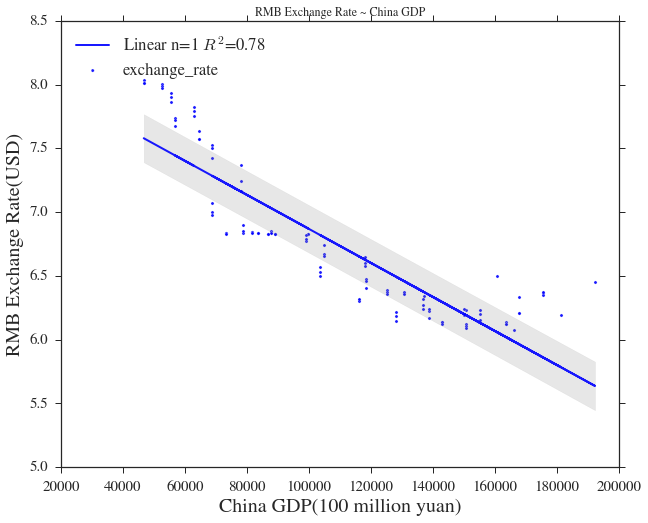

In [138]:
#generate the model
mod = smf.ols(formula='exchange_rate ~ 1 + gdp', data=china).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(china.gdp.min(), china.gdp.max(), len(china.gdp))
x_pred2 = sm.add_constant(x_pred)

#confidence = 50% (alpha=0.5)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(china.gdp, china.exchange_rate, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(china.gdp, mod.predict(china[['gdp']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('China GDP(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("RMB Exchange Rate ~ China GDP")

mod.summary()

The Prob(F-statistic) of this model is 2.42e-37, which is very small. This means the model is working well for predicting RMB exchange rate based on China GDP.  

The prediction bands identify the region that specifies where a given percentage of points(50%) should fall. 

### Regression Line Confidence Intervals

In [139]:
import scipy

def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),1000)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

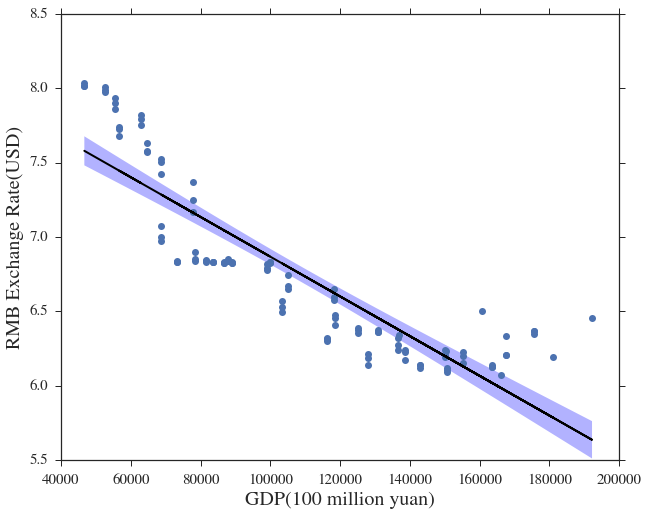

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          exchange_rate   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     380.5
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           2.42e-37
Time:                        23:52:01   Log-Likelihood:                -12.775
No. Observations:                 111   AIC:                             29.55
Df Residuals:                     109   BIC:                             34.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.2019      0.078    104.892      0.000         8.047     8.357
gdp        -1.334e-05   6.84e-07    -19.507      0.000     -1.47e-05  -1.2e-05
==============================================================================
Omnibus:                        9.766   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.151
Skew:                           0.702   Prob(JB):                      0.00625
Kurtosis:                       2.528   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
yl,yu,xd = linregress_CIs(china.gdp.as_matrix(),china.exchange_rate.as_matrix(), .95)
mod = smf.ols(formula='exchange_rate ~ 1 + gdp', data=china).fit()

plt.xlabel('GDP(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')
plt.plot(china.gdp,china.exchange_rate, 'o')
plt.plot(china.gdp, mod.params[1]*china.gdp+mod.params[0],'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
mod.summary()


The **prediction band** deals specifically with where the **predictions** should fall, while the **confidence intervals** define where the true **regression line** should fall. 


The blue area is a 95% confidence interval on the line. Given the assumptions of linear regression, you can be 95% confident that the two curved confidence bands enclose the true best-fit linear regression line, leaving a 5% chance that the true line is outside those boundaries. Many data points will be outside the 95% confidence bands. The confidence bands are 95% sure to contain the best-fit regression line.

### Test on Model

Now let's give a test of our model.

From data we got before, we know that China GDP in Jun 2016 is 17,992,660 million yuan. We can use the data to predict RMB exchange rate.

In [141]:
mod.predict(pd.Series(data={'gdp':[179926.6]}))

array([ 5.80146014])

The real average exchange rate in Jun 2016 is 6.589098. Which is quite different.

Through the dots distribution, we can see that there can be a better model. 

Let's try Polynomial Regression!

### Polynomial Regression Model 1

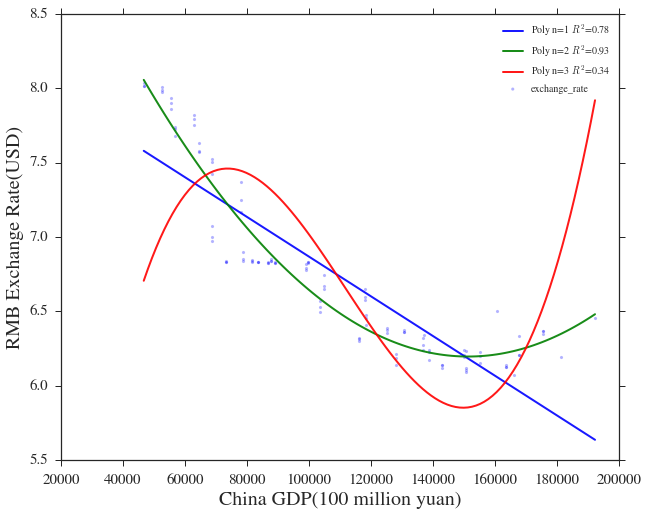

In [142]:
plt.scatter( china.gdp, china.exchange_rate, s=10, alpha=0.3)
plt.xlabel('China GDP(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')

# points linearlyd space on lstats
x = pd.DataFrame({'gdp': np.linspace(china.gdp.min(), china.gdp.max(), len(china.gdp)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='exchange_rate ~ 1 + gdp', data=china).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='exchange_rate ~ 1 + gdp + I(gdp ** 2.0)', data=china).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='exchange_rate ~ 1 + gdp + I(gdp ** 2.0) + I(gdp ** 3.0)', data=china).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

In [143]:
print "2-st order polynomial"
print poly_2.summary()

2-st order polynomial
                            OLS Regression Results                            
Dep. Variable:          exchange_rate   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     754.2
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           3.50e-64
Time:                        23:52:05   Log-Likelihood:                 54.031
No. Observations:                 111   AIC:                            -102.1
Df Residuals:                     108   BIC:                            -93.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        10.0846

**We can see that the 2nd order polynomial model is much better than other two models. It's Prob (F-statistic) value is 3.50e-64. So the 2nd order polynomial model is the best choice! **

Next, let's change another indicator and see how it relates to exchange rate.

### 4.2 OLS Regression Model for the association between RMB Exchange Rate and RMB Money Supply

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          exchange_rate   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     444.8
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           2.86e-40
Time:                        23:52:05   Log-Likelihood:                -5.9273
No. Observations:                 111   AIC:                             15.85
Df Residuals:                     109   BIC:                             21.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        8.2429      0.074    110.953      0.000         8.096     8.390
money_supply -6.198e-06   2.94e-07    -21.090      0.000     -6.78e-06 -5.62e-06
==============================================================================
Omnibus:                        8.334   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.282
Skew:                           0.661   Prob(JB):                       0.0159
Kurtosis:                       3.204   Cond. No.                     7.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

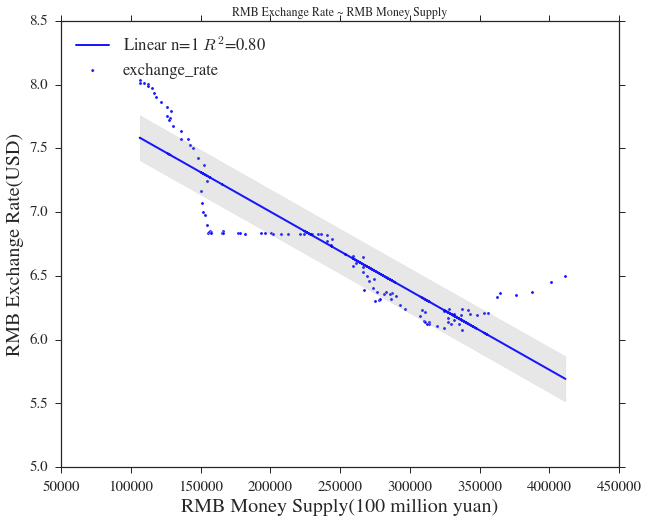

In [144]:
#generate the model
mod = smf.ols(formula='exchange_rate ~ 1 + money_supply', data=china).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(china.money_supply.min(), china.money_supply.max(), len(china.money_supply))
x_pred2 = sm.add_constant(x_pred)

#confidence = 50% (alpha=0.5)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(china.money_supply, china.exchange_rate, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(china.money_supply, mod.predict(china[['money_supply']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('RMB Money Supply(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("RMB Exchange Rate ~ RMB Money Supply")

mod.summary()

As we can see it is also not fit well, let's see the polynomial regression model.

### Polynomial Regression Model 2

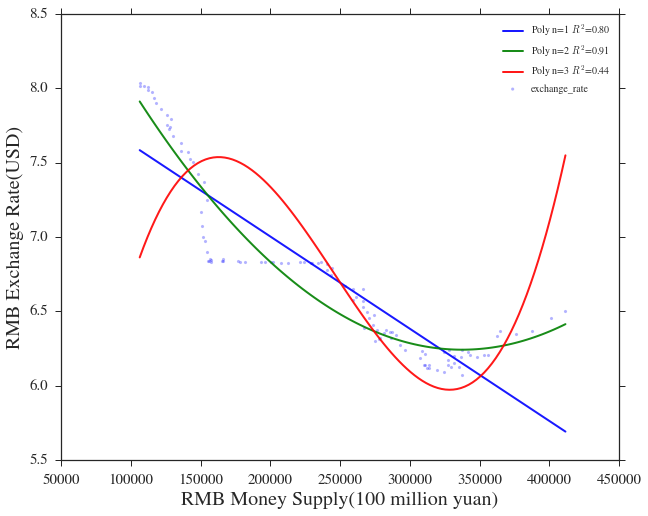

In [145]:
plt.scatter( china.money_supply, china.exchange_rate, s=10, alpha=0.3)
plt.xlabel('RMB Money Supply(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')

# points linearlyd space on lstats
x = pd.DataFrame({'money_supply': np.linspace(china.money_supply.min(), china.money_supply.max(), len(china.money_supply)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='exchange_rate ~ 1 + money_supply', data=china).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='exchange_rate ~ 1 + money_supply + I(money_supply ** 2.0)', data=china).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='exchange_rate ~ 1 + money_supply + I(money_supply ** 2.0) + I(money_supply ** 3.0)', data=china).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()


The 2-nd order polynomial is better than the linear regression model.

In [146]:
print "2-st order polynomial"
print poly_2.summary()

2-st order polynomial
                            OLS Regression Results                            
Dep. Variable:          exchange_rate   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     542.5
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           4.66e-57
Time:                        23:52:08   Log-Likelihood:                 37.172
No. Observations:                 111   AIC:                            -68.34
Df Residuals:                     108   BIC:                            -60.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Interc

### 4.3 OLS Regression Model for the association between RMB Exchange Rate and Retail Sales of Consumer Goods

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          exchange_rate   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     269.2
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           3.21e-31
Time:                        23:52:08   Log-Likelihood:                -27.089
No. Observations:                 111   AIC:                             58.18
Df Residuals:                     109   BIC:                             63.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          7.8903      0.075    105.510      0.000         7.742     8.039
consumer_sales -7.865e-05   4.79e-06    -16.408      0.000     -8.82e-05 -6.92e-05
==============================================================================
Omnibus:                       13.825   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.585
Skew:                           0.888   Prob(JB):                     0.000413
Kurtosis:                       2.537   Cond. No.                     3.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

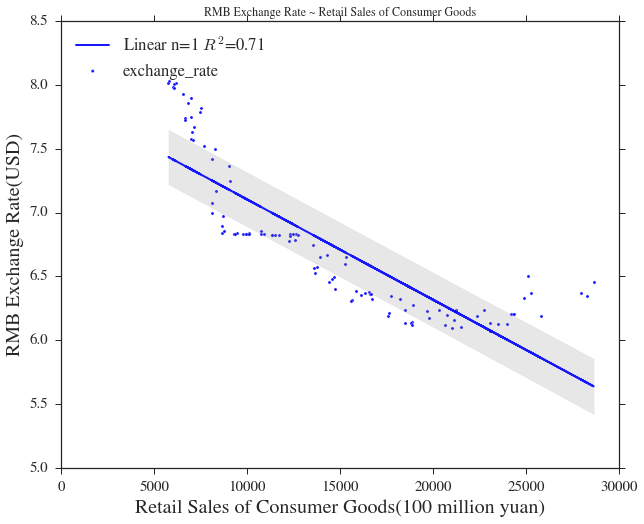

In [147]:
#generate the model
mod = smf.ols(formula='exchange_rate ~ 1 + consumer_sales', data=china).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(china.consumer_sales.min(), china.consumer_sales.max(), len(china.consumer_sales))
x_pred2 = sm.add_constant(x_pred)

#confidence = 50% (alpha=0.5)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(china.consumer_sales, china.exchange_rate, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(china.consumer_sales, mod.predict(china[['consumer_sales']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Retail Sales of Consumer Goods(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("RMB Exchange Rate ~ Retail Sales of Consumer Goods")

mod.summary()

Still not satisfying, polynomial regression should be more suitable for this data.

### Polynomial Regression Model 3

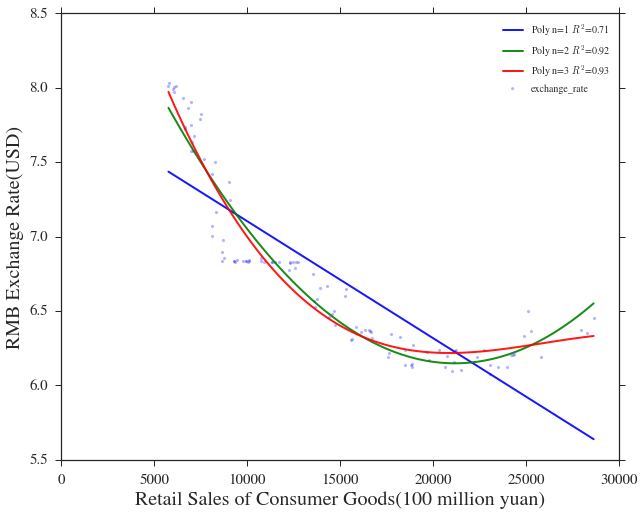

In [148]:
plt.scatter( china.consumer_sales, china.exchange_rate, s=10, alpha=0.3)
plt.xlabel('Retail Sales of Consumer Goods(100 million yuan)')
plt.ylabel('RMB Exchange Rate(USD)')

# points linearlyd space on lstats
x = pd.DataFrame({'consumer_sales': np.linspace(china.consumer_sales.min(), china.consumer_sales.max(), len(china.consumer_sales)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='exchange_rate ~ 1 + consumer_sales', data=china).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='exchange_rate ~ 1 + consumer_sales + I(consumer_sales ** 2.0)', data=china).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='exchange_rate ~ 1 + consumer_sales + I(consumer_sales ** 2.0) + I(consumer_sales ** 3.0)', data=china).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()


In [149]:
print "2-st order polynomial"
print poly_2.summary()
print '\n'
print "3-st order polynomial"
print poly_3.summary()

2-st order polynomial
                            OLS Regression Results                            
Dep. Variable:          exchange_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     639.1
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           1.40e-60
Time:                        23:52:12   Log-Likelihood:                 45.504
No. Observations:                 111   AIC:                            -85.01
Df Residuals:                     108   BIC:                            -76.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
In

**Both quadratic polynomial and cubic polynomial are perfect models based on the result.  
Prob (F-statistic):           1.40e-60 and 3.20e-62 **

### 4.4 Multiple Linear Regression

In [150]:
multi_linear = smf.ols(formula='exchange_rate ~ gdp + money_supply + consumer_sales', data=china).fit()
print multi_linear.params[0:4]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept         8.680972
gdp              -0.000020
money_supply     -0.000007
consumer_sales    0.000140
dtype: float64
R-Squared:  0.857216211001


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          exchange_rate   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           4.59e-45
Time:                        23:52:12   Log-Likelihood:                 11.887
No. Observations:                 111   AIC:                            -15.77
Df Residuals:                     107   BIC:                            -4.935
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          8.6810      0.094     92.132      0.000         8.494     8.868
gdp            -2.011e-05   3.71e-06     -5.426      0.000     -2.75e-05 -1.28e-05
money_supply   -7.368e-06   1.17e-06     -6.277      0.000      -9.7e-06 -5.04e-06
consumer_sales     0.0001   2.24e-05      6.274      0.000      9.59e-05     0.000
==============================================================================
Omnibus:                        0.283   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.457
Skew:                          -0.038   Prob(JB):                        0.796
Kurtosis:                       2.695   Cond. No.                     1.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary

** Quadratic polynomial regression is the most suitable for predicting exchange rate based on these indicators. **

### 4.5 k-Nearest Neighbors

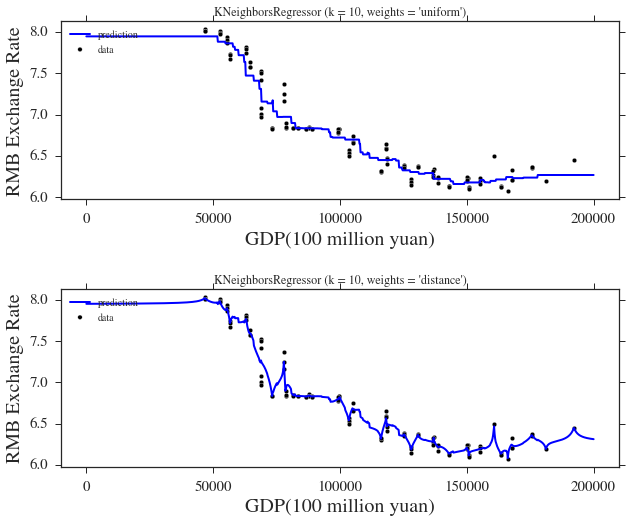

In [151]:
X = china.gdp.values
X = np.reshape(X, (len(china.gdp), 1.0))
y = china.exchange_rate.values
y = np.reshape(y, (len(china.exchange_rate), 1.0))

# Fit regression model
x = np.linspace(0, 200000, 1000)[:, np.newaxis]
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X, y).predict(x)
    #print y_hat
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(x, y_hat, c='b', label='prediction')
    plt.axis('tight')
    plt.xlabel('GDP(100 million yuan)')
    plt.ylabel('RMB Exchange Rate')
    plt.legend(loc='upper left')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.subplots_adjust( hspace=0.5)
    
plt.show()

Let's determine what is the best value of k for this dataset.
For this, we will use the RMSE and the R^2 metrics.

First of all, let's train the model:

In [152]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='uniform')
mod = knn.fit(X, y)

In [153]:
x = np.reshape(china['gdp'].values.astype(float), (len(china['gdp']), 1)) + 0.001

Then we create the predicted values:

In [154]:
y_hat = mod.predict(x)

Next, define a method that calculates the R^2 and the RMSE measures:

In [155]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

In [156]:
calculate_regression_goodness_of_fit(y, y_hat)

(0.90822276002912605, 0.13733582356671412)

Now that we know that the function works, we want to re-train the model with different values of k, beginning with 2 to the size of the dataset, and inspect the effect that varying k has on the accuracy measures.

In [157]:
rsquare_arr = []
rmse_arr = []

for k in range(2, len(y)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)
    rsquare_arr.append(rsquare)

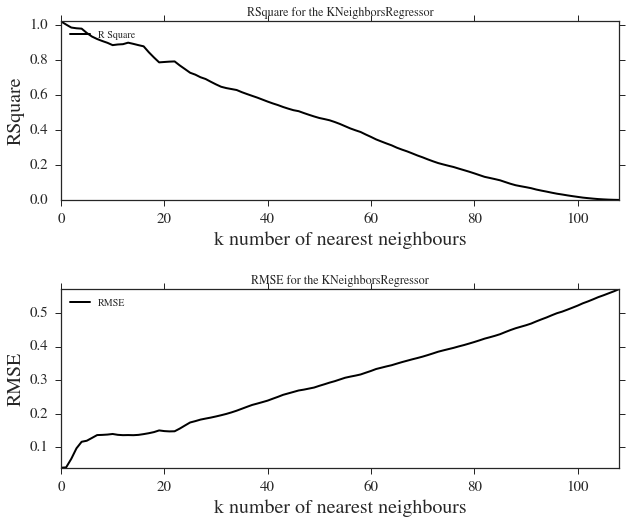

In [158]:
plt.subplot(2, 1, 1)
plt.plot(range(len(rmse_arr)), rsquare_arr, c='k', label='R Square')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RSquare')
plt.legend(loc='upper left')
plt.title("RSquare for the KNeighborsRegressor")
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(range(len(rmse_arr)), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")

From above plot, we can see when k =10 the model is pretty accurate.

From data we got before, we know that China GDP in Jun 2016 is 17,992,660 million yuan. We can use the data to predict RMB exchange rate.

In [159]:
mod.predict(179926.6)

array([[ 6.2679947]])

Real value is 6.589098. We can see that this is much precise than our previous OLS regression model.

## 5. Conclusion

This is just a glimpse of how we can use regression models to make analysis and prediction on macroeconomic data. From the data, we can see that China is in fast development right now. Chinese yuan (RMB) is appreciating during last ten years, we can see that it is mainly affected by GDP, money supply and retail sales of consumer goods.

In [160]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});


<IPython.core.display.Javascript object>